# Fake News Prediction using NLP and Classification

***

### Background

Reddit is a social news website and forum where content is socially curated and promoted by site members through voting. Posts are organized by subject into user-created boards called "communities" or "subreddits", which cover a wide variety of topics. Ranked among the most popular mobile social apps in the United States, Reddit has more than 48 million monthly active users (as of June 2021). Its prominence and popularity makes it a good data source for this project.

***

### Problem Statement

Four in five Singaporeans say that they can confidently spot fake news, but when put to the test, about 90 per cent mistakenly identified at least one out of five fake headlines as being real. Thus, while one could be confident about his ability to detect fake news, one may not be able to do in reality.
<font size="1">[Source](https://www.straitstimes.com/singapore/4-in-5-singaporeans-confident-in-spotting-fake-news-but-90-per-cent-wrong-when-put-to-the)</font>  

People fall into the trap of reading fake news because they were written like real news to deliberately  misinform or deceive readers. Fake news is not just making people believe false things, it’s also making people less likely to consume or accept information.
<font size="1">[Source](https://www.theatlantic.com/ideas/archive/2019/06/fake-news-republicans-democrats/591211/)</font>  

Fake news is a prevalent and harmful problem in our modern society, often misleading the general public on important topics such as healthcare and defense. This can lead to societal issues which is detrimental to our society. More than making people believe false things, the rise of fake news is making it harder for people to see the truth.


In view of this menace, we aim to develop a model that is discerning enough to separate real news from fake news, so that government bodies can weed out the fake news, thus creating a secure, and more misinformation-resilient society in the long term. We want to create a model that will help us to identify real and fake news based on the title of a post.

Titles are a strong differentiating factor between fake and real news. In general, fake news has very little information or substance in the article content but packs a ton of information into the titles. Titles are often the determining factor on whether someone will click on or read the article.
<font size="1">[Source](https://medium.com/the-nela-research-blog/fake-news-starts-with-the-title-ad7b63bf79c0)</font>  

To tackle the problem, we will foucus on text-based news from subreddit `TheOnion` and `NotTheOnion`, using natural language processing and machine learning models to predict whether a post is from `TheOnion` (fake news) or from `NotTheOnion` (real news). 

- **Primary** Stakeholders: Reddit Users, General Public
- **Secondary** Stakeholders: Reddit Moderators, Government

***

### Dataset

<img src="images/onion or not.jpg" width="400"/>

For this project, we have selected the following subreddits that are seemingly similar; In actual fact, only one thread lists real news while the other thread lists fake news.
- [r/TheOnion](https://www.reddit.com/r/TheOnion/): a subreddit that lists **satire** news or **fake** stories that are ridiculous, written in such a way that makes it seem plausible.
- [r/NotTheOnion](https://www.reddit.com/r/nottheonion/): a subreddit that lists **real** news stories so absurd that one could honestly believe they were from `TheOnion`

***

### Goal 

Our team aims to develop a model using natural language processing and machine learning models to predict whether an article is from `r/TheOnion` (fake news) or `r/NotTheOnion` (real news). 

After scraping posts from the two subreddits: `TheOnion` and `NotTheOnion`, we will use Natural Language Processing (NLP) to train a classification model to identify which subreddit a given post came from, based on the title of a post.

***

### Evaluation of Success
- Model score
- F1 score*

<font size="1">\* High F1 score $\implies$ low occurrence of False Positives (FP) and False Negatives (FN). We want to minimize both since the impact of both FPs and FNs are equally severe.</font> 

***

### Contents<a class="anchor" id="toc"></a>

- **[0. Data Scraping from Reddit](#0)**
- **[1. Import Scraped Data & Libraries](#1)**
- **[2. Data Cleaning & EDA](#2)**
    - 2a. Basic Exploratory Data Analysis
    - 2b. Making Subreddits Binary
    - 2c. Analysing Title Length
    - 2d. WordCloud (Pre-cleaning and Tokenization)
    - 2e. Data Cleaning I: Removing Links
    - 2f. Data Cleaning II: Removing non-Alphabetical/non-Numberical, Single Character Words
    - 2g. Data Cleaning III: Lemmatization and Tokenization
    - 2h. Drop Duplicates
    - 2i. WordCloud (After Data Cleaning and Tokenization)

- **[3. Tokenization & Top Words](#3)**

- **[4. Train Test Split](#4)**

- **[5. Building & Fitting Models](#5)**
    - 5a. Baseline Model
    - 5b. CountVectorizer & Multinomial Naive Bayes Classifier Model
    - 5c. TfidfVectorizer & Multinomial Naive Bayes Classifier Model
    - 5d. CountVectorizer & Logistic Regression Model
    - 5e. TfidfVectorizer & Logistic Regression Model
    - 5f. CountVectorizer  & Random Forest Model
    - 5g. TfidfVectorizer & Random Forest Model

- **[6. Best Model](#6)**
    - 6a. Fitting Model Based on Best Parameters from GridSearchCV
    - 6b. Analysing Top Words
    - 6c. Scoring the Best Model (Classification Report & Confusion Matrix)
    - 6d. Receiver Operating Characteristic (ROC) Curve
    - 6e. True Positives and True Negatives Analysis

- **[7. Interpreting Model Coefficient](#7)**

- **[8. Conclusion](#8)**
    - 8a. Best Model
    - 8b. Problems
    - 8c. Possible Enhancements

***

## 0. Data Scraping from Reddit<a class="anchor" id="0"></a>

In [4]:
import requests
import pandas as pd
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')
url = 'https://api.pushshift.io/reddit/search/submission'

`pull_reddit` is a function to extract posts from the subreddits `r/TheOnion` and `r/NotTheOnion`

We want to 
- pull at least 5,000 posts from each dataset;
- timestamp date: before 1st January 2022, 0:00 hrs, (GMT+8);
- combine the dataframes delete duplicates as we pull in blocks of 100 posts;
- export data as .csv files

In [503]:
# creating a function to pull n number of subreddits posts
def pull_reddit(sub_r, n):
    params = {
    'subreddit': sub_r,
    'size': 100,
    'before': 1640995200}
    
    data = requests.get(url, params).json()    
    df = pd.DataFrame(data['data'])
    df.drop_duplicates(subset="title", keep="last", inplace=True)
    
    while len(df) <= n:
        params2 = {
            'subreddit': sub_r,
            'size': 100,
            'before': df.created_utc.iloc[-1]
        }
        
        data2 = requests.get(url, params2).json()
        df2 = pd.DataFrame(data2['data'])
        df = pd.concat([df, df2], axis=0)
        df.drop_duplicates(subset="title", keep="last", inplace=True)
    
    df = df[['subreddit','title']] 
    df.reset_index(inplace=True)
    print(f'Sub-reddit [{sub_r}] shape: {df.shape}')
    
    # export sub reddit into data folder
    df.to_csv('./data/' +sub_r+ '.csv', index=None) 
    
    return df

In [5]:
# edit the 2 subpreddits of interest:
reddit_1 = "TheOnion"
reddit_2 = "nottheonion"

In [501]:
reddit_1_df = pull_reddit('TheOnion',5500)

Sub-reddit [TheOnion] shape: (5518, 3)


In [504]:
reddit_2_df = pull_reddit('nottheonion',5500)

Sub-reddit [nottheonion] shape: (5530, 3)


[Contents](#toc)
***
## 1. Import Scraped Data & Libraries <a class="anchor" id="1"></a>

In [126]:
# ------ EDA ------
import numpy as np
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# ------ sklearn ------
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import svm

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ------ NLP ------
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import words, stopwords
stopwords = stopwords.words('english')

In [127]:
df1 = pd.read_csv('./data/' + reddit_1 + '.csv')
df1.drop(labels='index', axis=1, inplace=True)

print(f'{reddit_1} dataframe shape: {df1.shape}')
df1.head(3)

TheOnion dataframe shape: (5518, 2)


,subreddit,title
0,TheOnion,Paleontologists Discover Fossil Evidence Of Ca...
1,TheOnion,Study: Vaping Doubles Risk Of Erectile Dysfunc...
2,TheOnion,Lies Fitness Trainers Tell Their Clients All T...


In [128]:
df2 = pd.read_csv('./data/' + reddit_2 + '.csv')
df2.drop(labels='index', axis=1, inplace=True)

print(f'{reddit_2} dataframe shape: {df2.shape}')
df2.head(3)

nottheonion dataframe shape: (5530, 2)


,subreddit,title
0,nottheonion,French burn fewer cars on New Year’s Eve due t...
1,nottheonion,This is how an earthquake of magnitude 6 was r...
2,nottheonion,Advices to a Business Trip to Brazil


In [129]:
# combining both dataframes into a single dataframe
df = pd.concat([df1,df2], axis=0)

df.reset_index(inplace=True)
df.drop(labels='index', axis=1, inplace=True)

print(f'{reddit_1} and {reddit_2} combined dataframe shape: {df.shape}')

df.head(2)

TheOnion and nottheonion combined dataframe shape: (11048, 2)


,subreddit,title
0,TheOnion,Paleontologists Discover Fossil Evidence Of Ca...
1,TheOnion,Study: Vaping Doubles Risk Of Erectile Dysfunc...


[Contents](#toc)
***
## 2. Data Cleaning & Exploratory Data Analysis  <a class="anchor" id="2"></a>
#### 2a. Basic EDA - Generate descriptive statistics, Check for Null Values

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11048 entries, 0 to 11047
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  11048 non-null  object
 1   title      11048 non-null  object
dtypes: object(2)
memory usage: 172.8+ KB


In [131]:
df['subreddit'].value_counts()

nottheonion    5530
TheOnion       5518
Name: subreddit, dtype: int64

In [132]:
df.isnull().sum()

subreddit    0
title        0
dtype: int64

Verified that we have no null values.
#### 2b. Making Subreddits Binary
Let
\begin{equation}
    \text{subreddit =}
    \begin{cases}
      0 & \text{if NotTheOnion}\\
      1 & \text{if TheOnion}\\
    \end{cases}       
\end{equation}

In [133]:
df['subreddit'] = df['subreddit'].replace("TheOnion", 1)
df['subreddit'] = df['subreddit'].replace("nottheonion", 0)
pd.concat([df.head(3), df.tail(3)])

,subreddit,title
0,1,Paleontologists Discover Fossil Evidence Of Ca...
1,1,Study: Vaping Doubles Risk Of Erectile Dysfunc...
2,1,Lies Fitness Trainers Tell Their Clients All T...
11045,0,Democrats Press for House Censure of Gosar for...
11046,0,Lightroom
11047,0,More than 500 hospitalized with stings after s...


#### 2c. Analysing Title Length
Checking for relationship between title length and the subreddit.

In [134]:
lst = []
for sentence in df['title']:
    lst.append(len(sentence.split()))
df['len'] = lst
df.head(3)

,subreddit,title,len
0,1,Paleontologists Discover Fossil Evidence Of Ca...,10
1,1,Study: Vaping Doubles Risk Of Erectile Dysfunc...,7
2,1,Lies Fitness Trainers Tell Their Clients All T...,9


Mean title length for TheOnion:    12.81
Mean title length for NotTheOnion: 12.35


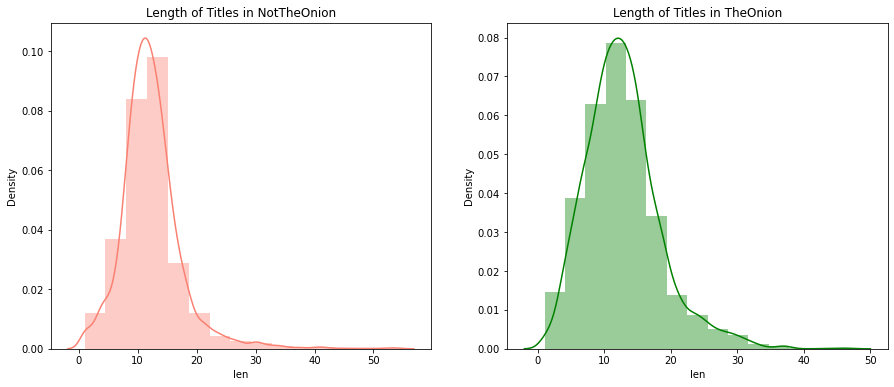

In [135]:
# Title length of both subreddits follows a normal distribution with similar mean
print(f"Mean title length for TheOnion:    {round(df[df['subreddit']==1]['len'].mean(),2)}")
print(f"Mean title length for NotTheOnion: {round(df[df['subreddit']==0]['len'].mean(),2)}")

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,6))

sns.distplot(df[df['subreddit']==0]['len'], bins=15, ax=ax0, color = 'salmon')
sns.distplot(df[df['subreddit']==1]['len'], bins=15, ax=ax1, color = 'green')

ax0.title.set_text("Length of Titles in NotTheOnion")
ax1.title.set_text("Length of Titles in TheOnion");

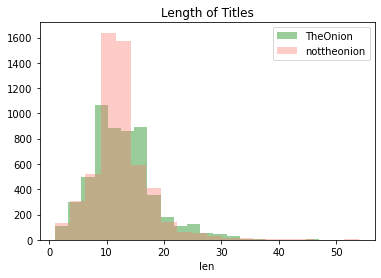

In [136]:
# combinine plots together for a better comparison
sns.distplot(df[df['subreddit']==1]['len'], color = 'green', bins=20, kde=False, label='TheOnion')
sns.distplot(df[df['subreddit']==0]['len'], color = 'salmon', bins=20, kde=False, label='nottheonion')
plt.title("Length of Titles");
plt.legend();


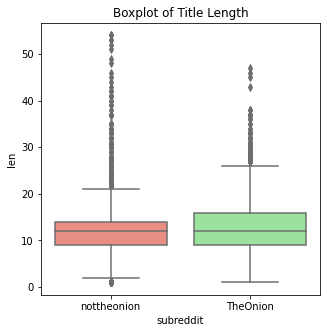

In [137]:
plt.figure(figsize=(5,5))
col = {0: "salmon", 1: "lightgreen"}

ax = sns.boxplot(data=df, y='len', x="subreddit", palette=col)
ax.set_xticklabels(labels=['nottheonion', 'TheOnion'])
plt.title("Boxplot of Title Length");

In [138]:
df[['subreddit','len']].corr()
# r value almost 0 implies almost no correlation

,subreddit,len
subreddit,1.000000,0.042193
len,0.042193,1.000000


From part 2c, we note that the length of titles in `TheOnion` is slightly longer, but given the low correlation coefficient $(r=0.048)$, we conclude that there is little evidence that title length will affect the subreddit classfication.

#### 2d. WordCloud (Pre-cleaning and Tokenization)

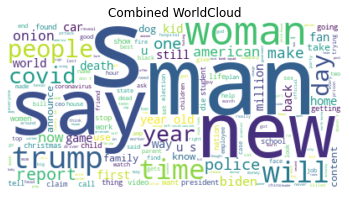

In [139]:
titles = df['title'].values
text = ' '.join(titles.tolist()).lower()
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Combined WorldCloud")
plt.axis("off");

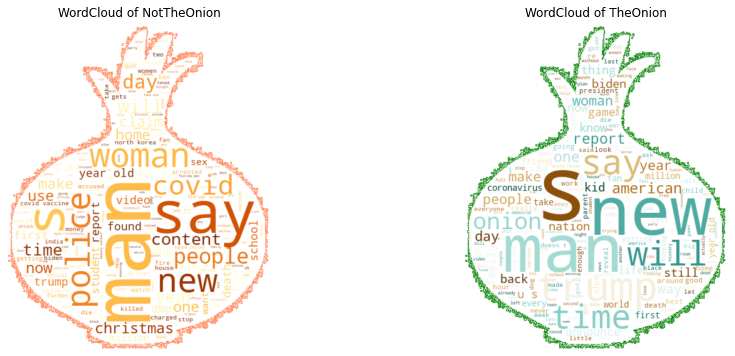

In [140]:
onion_mask = np.array(Image.open('./images/onion.jpeg'))

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,6))

titles0 = df[df['subreddit']==0]['title'].values
text0 = ' '.join(titles0.tolist()).lower()

wordcloud = WordCloud(background_color="white",
                      colormap='YlOrBr',
                      mask=onion_mask,
                      collocations=True,
                      contour_color='coral',
                      contour_width=0.1).generate(text0)

ax0.imshow(wordcloud, interpolation='bilinear')
ax0.axis("off")

# ===========================================================
titles1 = df[df['subreddit']==1]['title'].values
text1 = ' '.join(titles1.tolist()).lower()
wordcloud = WordCloud(background_color="white",
                      colormap='BrBG',
                      mask=onion_mask,
                      collocations=True,
                      contour_color='green',
                      contour_width=0.1).generate(text1)

# Display the generated image:
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")


ax0.title.set_text("WordCloud of NotTheOnion")
ax1.title.set_text("WordCloud of TheOnion");

#### 2e. Data Cleaning I: Removing Links

In [141]:
print("Dropping Links: \n")
for i in range(len(df['title'])):
    if "http" in df.loc[i]['title'].lower() or "www" in df.loc[i]['title'].lower():
        print(df['title'][i].lower())
        df.drop([i], inplace=True)

Dropping Links: 

the onion is made a podcast called "the topical" ( https://link.chtbl.com/ep1 ) found this preview - what do we think?
https://politics.theonion.com/one-eyed-man-who-kamala-harris-locked-up-25-years-ago-q-1840182471
empire market invite: http://empiremktxgjovhm.onion/ref/142
http://steamcommunity.com/groups/69xxx_midget-clan_xxx69
www.yahoo.com/amphtml/entertainment/brian-williams-warns-of-darkness-spreading-during-final-broadcast-as-nbc-anchor-083036466.html
cop who ended beatles’ final show still happy with his conduct read more: cop who ended beatles' final show still happy with his conduct | https://ultimateclassicrock.com/beatles-rooftop-cop/
kristen stewart is developing a gay ghost-hunting reality show read more: https://www.slashfilm.com/661508/kristen-stewart-is-developing-a-gay-ghost-hunting-reality-show/?utm_campaign=clip


In [142]:
df.reset_index(drop=True, inplace=True)
pd.concat([df.head(3), df.tail(3)])

,subreddit,title,len
0,1,Paleontologists Discover Fossil Evidence Of Ca...,10
1,1,Study: Vaping Doubles Risk Of Erectile Dysfunc...,7
2,1,Lies Fitness Trainers Tell Their Clients All T...,9
11038,0,Democrats Press for House Censure of Gosar for...,11
11039,0,Lightroom,1
11040,0,More than 500 hospitalized with stings after s...,15


#### 2f. Data Cleaning II: Removing non-Alphabetical/non-Numberical, Single Character Words
- Removing non-Alphabetical and Numberical words as we are trying to focus on English posts. We eliminated posts in other languages, emojis and symbols.
- Removing the words "Removed" and "Deleted". These are indications by Reddit moderators when a post had been removed/deleted. 
- Removing words with two characters or less, as these have little or no meaning in our findings.

In [143]:
for i in range(len(df['title'])):
    df['title'] = df['title'].astype(str)
    text = df['title'][i].lower()
    # remove non-alphabets & non-numbers
    text = re.sub("[^a-zA-Z0-9]+", " ",text)
    
    # remove stop words
    # text = " ".join([word for word in text.split() if word not in stopwords])
    
    # remove words "removed" and "deleted"
    text = text.replace("removed", "")
    text = text.replace("deleted", "")
    
    # remove word "amp", as &amp; is an error that stands for ampersands   
    text = text.replace("amp", "")

    
    # remove single character words
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    text = shortword.sub('', text).strip()
    
    df['title'][i] = text
pd.concat([df.head(3), df.tail(3)])

,subreddit,title,len
0,1,paleontologists discover fossil evidence caree...,10
1,1,study vaping doubles risk erectile dysfunction,7
2,1,lies fitness trainers tell their clients all t...,9
11038,0,democrats press for house censure gosar for vi...,11
11039,0,lightroom,1
11040,0,more than 500 hospitalized with stings after s...,15


#### 2g. Data Cleaning III: Lemmatization and Tokenization
We want to reduce tokens (words) into their base form.

In [144]:
# creating a function for lemmatization and tokenization 

def text_lemmentize(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text_tokens = tokenizer.tokenize(text.lower())
    lem_tokens = [lemmatizer.lemmatize(i) for i in text_tokens]
    new_text = ' '.join(lem_tokens)
    
    # remove single character words again
    new_text = re.compile(r'\W*\b\w{1,2}\b')
    new_text = new_text.sub('', text).strip()
    return new_text

df['title'] = [text_lemmentize(i) for i in df['title']]
pd.concat([df.head(3), df.tail(3)])

,subreddit,title,len
0,1,paleontologists discover fossil evidence caree...,10
1,1,study vaping doubles risk erectile dysfunction,7
2,1,lies fitness trainers tell their clients all t...,9
11038,0,democrats press for house censure gosar for vi...,11
11039,0,lightroom,1
11040,0,more than 500 hospitalized with stings after s...,15


#### 2h) Drop Duplicates
Droppng duplicates after data cleaning again to ensure that there are no duplicates in our training set that will overestimate the fitness of our model.

In [145]:
# remove duplicates
old_df_shape = df.shape[0]
df.drop_duplicates(subset="title", inplace=True)

new_df_shape = df.shape[0]
print(f'{old_df_shape - new_df_shape} columns dropped')

250 columns dropped


#### 2i. WordCloud (After Data Cleaning and Tokenization)
Plotting a Wordcloud again to display a cleaned and tokenized version of our corpus.

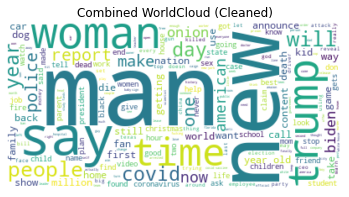

In [146]:
titles = df['title'].values
text = ' '.join(titles.tolist()).lower()
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Combined WorldCloud (Cleaned)")
plt.axis("off");

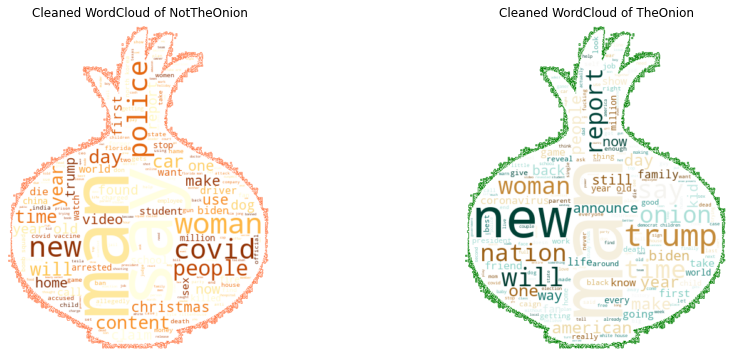

In [147]:
onion_mask = np.array(Image.open('./images/onion.jpeg'))

# Title length of both subreddits follows a normal distribution with similar mean
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,6))

titles0 = df[df['subreddit']==0]['title'].values
text0 = ' '.join(titles0.tolist()).lower()

wordcloud = WordCloud(background_color="white",
                      colormap='YlOrBr',
                      mask=onion_mask,
                      collocations=True,
                      contour_color='coral',
                      contour_width=0.1).generate(text0)

# Display the generated image:
ax0.imshow(wordcloud, interpolation='bilinear')
ax0.axis("off")

# ===========================================================
titles1 = df[df['subreddit']==1]['title'].values
text1 = ' '.join(titles1.tolist()).lower()
wordcloud = WordCloud(background_color="white",
                      colormap='BrBG',
                      mask=onion_mask,
                      collocations=True,
                      contour_color='green',
                      contour_width=0.1).generate(text1)

# Display the generated image:
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis("off")

ax0.title.set_text("Cleaned WordCloud of NotTheOnion")
ax1.title.set_text("Cleaned WordCloud of TheOnion");

Our goal is to create a model to accrately predict if a post is from `TheOnion` or `NotTheOnion`. We want to find out what are the common words in `TheOnion` and `NotTheOnion`. From our EDA, we can identify the common keywords in the headlines from each subreddit in the wordcloud we have created. We note that there is a variation of top words in the two subreddits. Before we look at our top words, we want to tokenize our data.

[Contents](#toc)
***
## 3. Tokenization & Top Words<a class="anchor" id="3"></a>

We tokenize text (in this case, titles) into smaller units called tokens (i.e. words, characters, subwords).

In [154]:
theonion_corpus = df.loc[df['subreddit']==1]
nottheonion_corpus = df.loc[df['subreddit']==0]

cvec = CountVectorizer(stop_words='english')
theonion_corpus_cvec = pd.DataFrame(cvec.fit_transform(theonion_corpus['title']).todense(),
                            columns = cvec.get_feature_names())
nottheonion_corpus_cvec = pd.DataFrame(cvec.fit_transform(nottheonion_corpus['title']).todense(),
                            columns = cvec.get_feature_names())
print(f'CountVectorized TheOnion Corpus: {theonion_corpus_cvec.shape}')
print(f'CountVectorized nottheonion Corpus: {nottheonion_corpus_cvec.shape}')

CountVectorized TheOnion Corpus: (5468, 12365)
CountVectorized nottheonion Corpus: (5323, 10588)


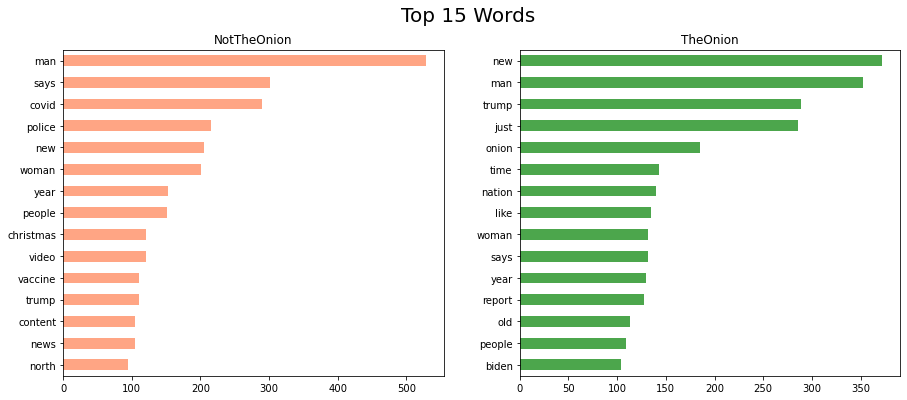

In [155]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,6))

nottheonion_corpus_cvec.sum().sort_values().tail(15).plot.barh(ax=ax0, color='coral',alpha=0.7)
theonion_corpus_cvec.sum().sort_values().tail(15).plot.barh(ax=ax1, color='green',alpha=0.7)

ax0.title.set_text("NotTheOnion")
ax1.title.set_text("TheOnion")
fig.suptitle("Top 15 Words",fontsize=20);

In [156]:
theonion_unique = []
for word in theonion_corpus_cvec.columns:
    if word not in nottheonion_corpus_cvec.columns:
        theonion_unique.append(word)
        # print(i)
print(f'No. of Words that are unique to TheOnion: {len(theonion_unique)}')
nottheonion_unique = []
for word in nottheonion_corpus_cvec.columns:
    if word not in theonion_corpus_cvec.columns:
        nottheonion_unique.append(word)
print(f'No. of Words that are unique to nottheonion: {len(nottheonion_unique)}')

No. of Words that are unique to TheOnion: 6622
No. of Words that are unique to nottheonion: 4845


*word is unique to subreddit; did not appear in the other subreddit


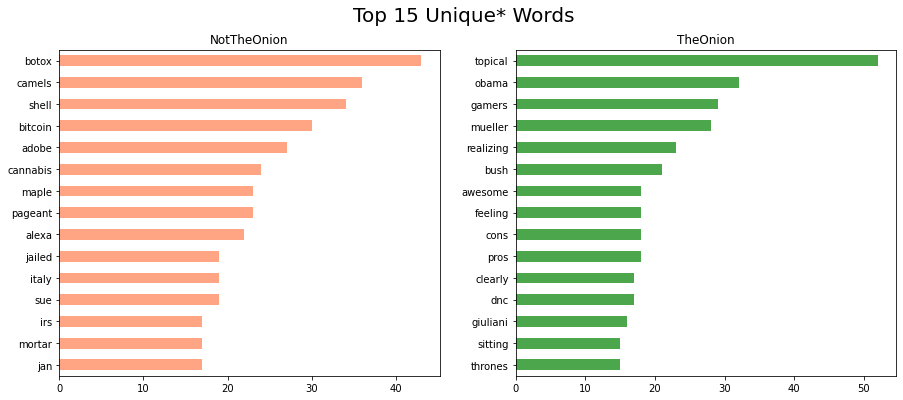

In [157]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,6))

nottheonion_corpus_cvec[nottheonion_unique].sum().sort_values().tail(15).plot.barh(ax=ax0, color='coral',alpha=0.7)
theonion_corpus_cvec[theonion_unique].sum().sort_values().tail(15).plot.barh(ax=ax1, color='green',alpha=0.7)

ax0.title.set_text("NotTheOnion")
ax1.title.set_text("TheOnion")
fig.suptitle("Top 15 Unique* Words",fontsize=20);
print("*word is unique to subreddit; did not appear in the other subreddit")

[Contents](#toc)
***
## 4. Train Test Split<a class="anchor" id="4"></a>

In [158]:
X = df['title']
y = df['subreddit']

print(f'X: {X.shape[0]}, y: {y.shape[0]}')
print('\n')
y.value_counts(normalize = True)

X: 10791, y: 10791




1    0.506719
0    0.493281
Name: subreddit, dtype: float64

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)
print(f'X_train: {X_train.shape[0]}')
print(f'X_test: {X_test.shape[0]}')
print(f'y_train: {y_train.shape[0]}')
print(f'y_test: {y_test.shape[0]}')

X_train: 8093
X_test: 2698
y_train: 8093
y_test: 2698


[Contents](#toc)
***
## 5. Building & Fitting Models<a class="anchor" id="5"></a>
#### 5a. Baseline Model

In [160]:
df['subreddit'].value_counts(normalize=True)

1    0.506719
0    0.493281
Name: subreddit, dtype: float64

Since the dataset is evenly split we will use mean as the baseline model.<br>

The baseline score of our model is established at 50.7% accuracy.
We want to build a model with an accuracy better than our baseline. We will use the baseline result (>0.507) as a comparision to interpret all other results from the models that we are going to build.

#### 5b. CountVectorizer & Multinomial Naive Bayes Classifier Model

In [32]:
pipe_cvec_mnb = Pipeline([
    ('cvec', CountVectorizer(analyzer = "word")),
    ('mnb', MultinomialNB())
])

pipe_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [None, 6_000,7_000,8_000],
    'cvec__min_df': [1, 2],
    'cvec__max_df': [.85, .9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'mnb__fit_prior': [True, False],
    'mnb__alpha': np.linspace(1.9,2,3)
}

gs_cvec_mnb = GridSearchCV(pipe_cvec_mnb, 
                  param_grid=pipe_params,
                  cv=5, n_jobs=-1)

# Fit GridSearch to training data.
gs_cvec_mnb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.85, 0.9, 0.95],
                         'cvec__max_features': [None, 6000, 7000, 8000],
                         'cvec__min_df': [1, 2],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'mnb__alpha': array([1.9 , 1.95, 2.  ]),
                         'mnb__fit_prior': [True, False]})

In [33]:
print('Best Score:', gs_cvec_mnb.best_score_)
print('Best Params:', gs_cvec_mnb.best_params_)
print("-------------------------------------------")
print('Score Model on Training Set:', gs_cvec_mnb.score(X_train, y_train))
print('Score Model on Testing Set:', gs_cvec_mnb.score(X_test, y_test))

Best Score: 0.8114399387373823
Best Params: {'cvec__max_df': 0.85, 'cvec__max_features': None, 'cvec__min_df': 1, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': None, 'mnb__alpha': 1.9, 'mnb__fit_prior': True}
-------------------------------------------
Score Model on Training Set: 0.9835660447300136
Score Model on Testing Set: 0.8235730170496665


#### 5c. TfidfVectorizer  & Multinomial Naive Bayes Classifier Model

In [34]:
pipe_tvec_mnb = Pipeline([
    ('tvec', TfidfVectorizer(analyzer = "word")),
    ('mnb', MultinomialNB())
])

pipe_params = {
    'tvec__stop_words': [None, 'english'],
    'tvec__max_features': [8_000,9_000,10_000],
    'tvec__min_df': [1, 2],
    'tvec__max_df': [.85, .9, .95],
    'tvec__ngram_range': [(1,1), (1,2)],
    'mnb__fit_prior': [True, False],
    'mnb__alpha': np.linspace(1.9,2,3)
}

gs_tvec_mnb = GridSearchCV(pipe_tvec_mnb, 
                  param_grid=pipe_params,
                  cv=5, n_jobs=-1)

# Fit GridSearch to training data.
gs_tvec_mnb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'mnb__alpha': array([1.9 , 1.95, 2.  ]),
                         'mnb__fit_prior': [True, False],
                         'tvec__max_df': [0.85, 0.9, 0.95],
                         'tvec__max_features': [8000, 9000, 10000],
                         'tvec__min_df': [1, 2],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [35]:
print('Best Score:', gs_tvec_mnb.best_score_)
print('Best Params:', gs_tvec_mnb.best_params_)
print("-------------------------------------------")
print('Score Model on Training Set:', gs_tvec_mnb.score(X_train, y_train))
print('Score Model on Testing Set:', gs_tvec_mnb.score(X_test, y_test))

Best Score: 0.7932750076158351
Best Params: {'mnb__alpha': 1.95, 'mnb__fit_prior': False, 'tvec__max_df': 0.85, 'tvec__max_features': 9000, 'tvec__min_df': 1, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': None}
-------------------------------------------
Score Model on Training Set: 0.8991721240578278
Score Model on Testing Set: 0.8005930318754633


#### 5d. CountVectorizer & Logistic Regression Model

In [36]:
pipe_cvec_logreg = Pipeline([
    ('cvec', CountVectorizer(analyzer = "word")),
    ('logreg', LogisticRegression())
])

pipe_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [8_000,9_000,10_000],
    'cvec__min_df': [1, 2],
    'cvec__max_df': [.85, .9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'logreg__penalty' : ["l1","l2"],
    'logreg__max_iter' : [100,300,500],
    'logreg__random_state': [42]
}

gs_cvec_logreg = GridSearchCV(pipe_cvec_logreg, 
                  param_grid=pipe_params,
                  cv=5)

# Fit GridSearch to training data.
gs_cvec_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.85, 0.9, 0.95],
                         'cvec__max_features': [8000, 9000, 10000],
                         'cvec__min_df': [1, 2],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'logreg__max_iter': [100, 300, 500],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__random_state': [42]})

In [37]:
print('Best Score:', gs_cvec_logreg.best_score_)
print('Best Params:', gs_cvec_logreg.best_params_)
print("-------------------------------------------")
print('Score Model on Training Set:', gs_cvec_logreg.score(X_train, y_train))
print('Score Model on Testing Set:', gs_cvec_logreg.score(X_test, y_test))

Best Score: 0.7948826932341608
Best Params: {'cvec__max_df': 0.85, 'cvec__max_features': 9000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': None, 'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__random_state': 42}
-------------------------------------------
Score Model on Training Set: 0.9671320894600272
Score Model on Testing Set: 0.8020756115641215


#### 5e. TfidfVectorizer & Logistic Regression Model

In [38]:
pipe_tvec_logreg = Pipeline([
    ('tvec', TfidfVectorizer(analyzer = "word")),
    ('logreg', LogisticRegression())
])

pipe_params = {
    'tvec__stop_words': [None, 'english'],
    'tvec__max_features': [None, 7_000, 8_000, 9_000],
    'tvec__min_df': [1, 2],
    'tvec__max_df': [.85, .9, .95],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)],
    'logreg__penalty' : ["l1","l2"],
    'logreg__max_iter' : [100,300,500],
    'logreg__random_state': [42]
}

gs_tvec_logreg = GridSearchCV(pipe_tvec_logreg, 
                  param_grid=pipe_params,
                  cv=5)

# Fit GridSearch to training data.
gs_tvec_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__max_iter': [100, 300, 500],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__random_state': [42],
                         'tvec__max_df': [0.85, 0.9, 0.95],
                         'tvec__max_features': [None, 7000, 8000, 9000],
                         'tvec__min_df': [1, 2],
                         'tvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tvec__stop_words': [None, 'english']})

In [39]:
print('Best Score:', gs_tvec_logreg.best_score_)
print('Best Params:', gs_tvec_logreg.best_params_)
print("-------------------------------------------")
print('Score Model on Training Set:', gs_tvec_logreg.score(X_train, y_train))
print('Score Model on Testing Set:', gs_tvec_logreg.score(X_test, y_test))

Best Score: 0.7968601381462866
Best Params: {'logreg__max_iter': 100, 'logreg__penalty': 'l2', 'logreg__random_state': 42, 'tvec__max_df': 0.85, 'tvec__max_features': None, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': None}
-------------------------------------------
Score Model on Training Set: 0.9288273816878784
Score Model on Testing Set: 0.8042994810971089


#### 5f. CountVectorizer  & Random Forest Model

In [40]:
pipe_cvec_rf = Pipeline([
    ('cvec', CountVectorizer(analyzer = "word")),
    ('rf', RandomForestClassifier(random_state=42))
])

pipe_params = {
    'cvec__stop_words': [None],
    'cvec__max_features': [3_000],
    'cvec__min_df': [2],
    'cvec__max_df': [.85],
    'cvec__ngram_range': [(1,2),(1,3)],
    'rf__n_estimators': [100,200],
    'rf__max_depth': [None,1]    
}

gs_cvec_rf = GridSearchCV(pipe_cvec_rf, 
                  param_grid=pipe_params,
                  cv=5)

# Fit GridSearch to training data.
gs_cvec_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'cvec__max_df': [0.85], 'cvec__max_features': [3000],
                         'cvec__min_df': [2],
                         'cvec__ngram_range': [(1, 2), (1, 3)],
                         'cvec__stop_words': [None], 'rf__max_depth': [None, 1],
                         'rf__n_estimators': [100, 200]})

In [41]:
print('Best Score:', gs_cvec_rf.best_score_)
print('Best Params:', gs_cvec_rf.best_params_)
print("-------------------------------------------")
print('Score Model on Training Set:', gs_cvec_rf.score(X_train, y_train))
print('Score Model on Testing Set:', gs_cvec_rf.score(X_test, y_test))

Best Score: 0.7543543107917339
Best Params: {'cvec__max_df': 0.85, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': None, 'rf__max_depth': None, 'rf__n_estimators': 200}
-------------------------------------------
Score Model on Training Set: 0.9961695292227851
Score Model on Testing Set: 0.7638991845811712


#### 5g TfidfVectorizer  & Random Forest Model

In [ ]:
pipe_tvec_rf = Pipeline([
    ('tvec', TfidfVectorizer(analyzer = "word")),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100))
])

pipe_params = {
    'tvec__stop_words': [None],
    'tvec__max_features': [3_000],
    'tvec__min_df': [1],
    'tvec__max_df': [.85],
    'tvec__ngram_range': [(1,2), (1,3)],
    'rf__n_estimators': [200,300],
    'rf__max_depth': [None,1]  
}

gs_tvec_rf = GridSearchCV(pipe_tvec_rf, 
                  param_grid=pipe_params,
                  cv=5)

# Fit GridSearch to training data.
gs_tvec_rf.fit(X_train, y_train)

In [ ]:
print('Best Score:', gs_tvec_rf.best_score_)
print('Best Params:', gs_tvec_rf.best_params_)
print("-------------------------------------------")
print('Score Model on Training Set:', gs_tvec_rf.score(X_train, y_train))
print('Score Model on Testing Set:', gs_tvec_rf.score(X_test, y_test))

In [186]:
model_list = [gs_cvec_mnb, gs_tvec_mnb, gs_cvec_logreg, gs_tvec_logreg,gs_cvec_rf,gs_tvec_rf]
vec_list_names = ["Count Vectorizer", "TFIDF", "Count Vectorizer", "TFIDF", "Count Vectorizer", "TFIDF"]
model_list_names = ["Multinomial Naive Bayes ", "Multinomial Naive Bayes ", "Logistic Regression",
                    "Logistic Regression","Random Forest","Random Forest"]

model_list_score = [model.best_score_ for model in model_list]
model_list_train_score = [model.score(X_train, y_train) for model in model_list]
model_list_test_score = [model.score(X_test, y_test) for model in model_list]

# collating scores from the different models into a dataframe
model_comparison = pd.DataFrame(list(zip(vec_list_names,model_list_names, model_list_score, 
                                         model_list_train_score,model_list_test_score)),
               columns =['Vectorizer','Model',"model_score", "train_score","test_score"])
#model_comparison.columns = ["train_score","test_score","precision","recall","f1","accuracy","specificity"]
model_comparison.style.hide_index()

Vectorizer,Model,model_score,train_score,test_score
Count Vectorizer,Multinomial Naive Bayes,0.811440,0.983566,0.823573
TFIDF,Multinomial Naive Bayes,0.793275,0.899172,0.800593
Count Vectorizer,Logistic Regression,0.794883,0.967132,0.802076
TFIDF,Logistic Regression,0.796860,0.928827,0.804299
Count Vectorizer,Random Forest,0.754354,0.996170,0.763899
TFIDF,Random Forest,0.754231,0.996170,0.768347


[Contents](#toc)
***
## 6. Best Model<a class="anchor" id="6"></a>
#### 6a. Fitting Model Based on Best Parameters from GridSearchCV

In [162]:
# Fitting best params (from gridsearch) into CountVectorizer 
cvec = CountVectorizer(max_df=0.85, max_features=7000, min_df=1, ngram_range=(1,2), stop_words=None)

X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

X_train_cvec_df = pd.DataFrame(X_train_cvec.todense(), 
                          columns=cvec.get_feature_names())

X_test_cvec_df = pd.DataFrame(X_test_cvec.toarray(), 
                          columns=cvec.get_feature_names())

print(X_train_cvec_df.shape)
print(X_test_cvec_df.shape)
X_train_cvec_df.head(3)

(8093, 7000)
(2698, 7000)


,000,000 after,000 cars,000 for,000 worth,000 years,100,100 000,100 best,100 million,...,zendaya,zero,zion,zion williamson,zombie,zone,zoo,zoom,zoom call,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
mnb = MultinomialNB(alpha=1.95, fit_prior=False)

mnb.fit(X_train_cvec, y_train)

print('Score Model on Training Set:', mnb.score(X_train_cvec, y_train))
print('Score Model on Testing Set:', mnb.score(X_test_cvec, y_test))

Score Model on Training Set: 0.8988014333374521
Score Model on Testing Set: 0.7998517420311342


#### 6b. Analysing Top Words

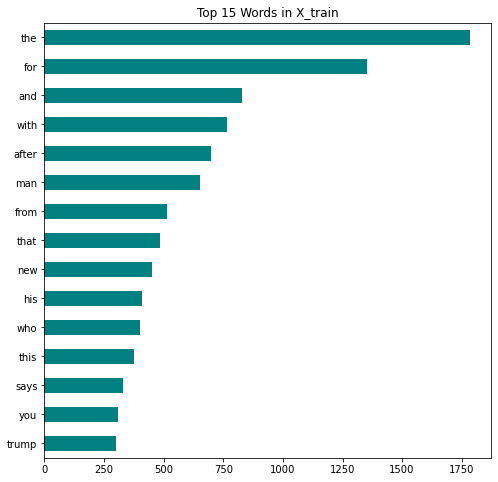

In [164]:
# X_train_cvec_df.sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(8,8))
plt.title("Top 15 Words in X_train")
X_train_cvec_df.sum().sort_values(ascending=True).tail(15).plot(kind='barh', color='teal');

(8093, 7000)


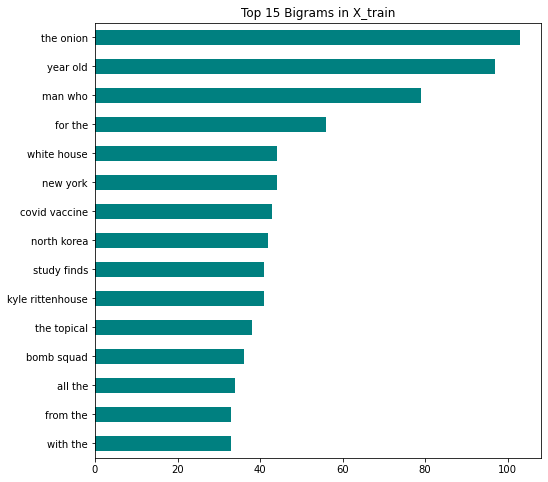

In [165]:
# Fitting best params (from gridsearch) into CountVectorizer 
cvec_bigrams = CountVectorizer(max_df=0.85, max_features=7000, min_df=1, ngram_range=(2,2), stop_words=None)

X_train_cvec_bigrams = cvec_bigrams.fit_transform(X_train)

X_train_cvec_bigrams_df = pd.DataFrame(X_train_cvec_bigrams.toarray(), 
                          columns=cvec_bigrams.get_feature_names())

print(X_train_cvec_bigrams_df.shape)
# X_train_cvec_bigrams_df.head(3)

plt.figure(figsize=(8,8))
plt.title("Top 15 Bigrams in X_train")
X_train_cvec_bigrams_df.sum().sort_values(ascending=True).tail(15).plot(kind='barh', color='teal');

#### 6c. Scoring the Best Model (Classification Report & Confusion Matrix)

In [166]:
y_pred = mnb.predict(X_test_cvec)
y_pred.shape

(2698,)

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1331
           1       0.78      0.85      0.81      1367

    accuracy                           0.80      2698
   macro avg       0.80      0.80      0.80      2698
weighted avg       0.80      0.80      0.80      2698



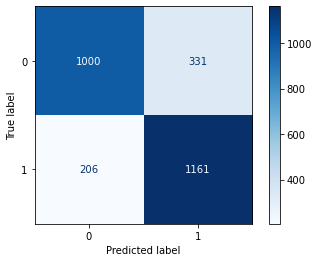

In [168]:
plot_confusion_matrix(mnb, X_test_cvec, y_test, cmap='Blues', values_format='d');

In [169]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

accuracy = metrics.accuracy_score(y_test, y_pred) # (tp+tn)/(tp+tn+fp+fn)
sensitivity = metrics.recall_score(y_test, y_pred) # tp/(tp+fn) 
specificity = tn/(tn+fp) 
precision = metrics.precision_score(y_test, y_pred) # tp/(tp+fp) 
f1 = f1_score(y_test,y_pred) # 2 * (precision * sensitivity) / (precision + sensitivity)


metric_values = [accuracy, sensitivity, specificity ,precision, f1]
metric_list = ["Accuracy", "Sensitivity/Recall", "Specificity","Precision","F1 score"]

metric_values = [str(round(metric*100,2))+"%" for metric in metric_values]

# collating scores from the different models into a dataframe
metric_df = pd.DataFrame({
    'Metric': metric_list,
    'Score': metric_values}, index=None)
metric_df.style.hide_index()

Metric,Score
Accuracy,80.1%
Sensitivity/Recall,84.93%
Specificity,75.13%
Precision,77.82%
F1 score,81.22%


#### 6d. Receiver Operating Characteristic (ROC) Curve

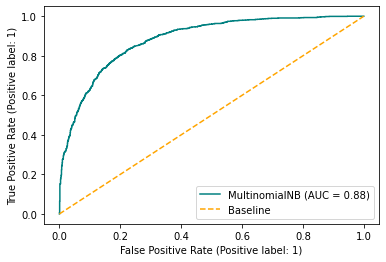

In [170]:
plot_roc_curve(mnb, X_test_cvec, y_test, color= 'teal')
plt.plot([0, 1], [0, 1],label='Baseline', linestyle='--',  color='orange')
plt.legend();

The ROC plot shows a fairly smooth curve with an AUC of 0.88 with the apex situated at around TP rate ~0.8.<br>

Using this with a classification threshold of 0.8 the model correctly classifying ~80% of post that came from `TheOnion` while only misclassifying 20% of articles from `NotTheOnion`.

#### 6e. True Positives and True Negatives Analysis

In [171]:
# Dataframe with X_test and predicted values
pred_df = pd.DataFrame(y_pred, columns=['predicted'])
actual_pred_df= pd.concat([pd.DataFrame(X_test).reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True), pred_df], axis=1)
actual_pred_df.columns = ['title', 'actual', 'predicted']
print(actual_pred_df.shape)
actual_pred_df.head(3)

(2698, 3)


,title,actual,predicted
0,kim jong panics after returning north korea fi...,1,0
1,fox news slams democrats for repeatedly attemp...,1,1
2,kotex introduces new confetti popper tons for ...,1,1


In [172]:
# True Positives: If Actual = Predicted = 1 (TheOnion) 
true_positives = actual_pred_df[(actual_pred_df.actual==1)&(actual_pred_df.predicted==1)]
print(f'True Positives: {true_positives.shape}')
true_positives.head(3)

True Positives: (1161, 3)


,title,actual,predicted
1,fox news slams democrats for repeatedly attemp...,1,1
2,kotex introduces new confetti popper tons for ...,1,1
3,creatures myth and folklore that are squatting...,1,1


In [173]:
# False Positives: If Actual = 0 (nottheonion) but Predicted = 1 (TheOnion) 
false_positives = actual_pred_df[(actual_pred_df.actual==0)&(actual_pred_df.predicted==1)]
print(f'False Positives: {false_positives.shape}')
false_positives.head(3)

False Positives: (331, 3)


,title,actual,predicted
4,roger stone visited the jfk qanon cult dallas,0,1
6,til that during ww2 heinz invented self heatin...,0,1
8,gift life,0,1


In [174]:
cvec = CountVectorizer(stop_words='english')
true_positives_cvec = cvec.fit_transform(true_positives.title)
true_positives_cvec = pd.DataFrame(true_positives_cvec.todense(), 
                          columns=cvec.get_feature_names())

print(f'Vectorized True Positives: {true_positives_cvec.shape}')

false_positives_cvec = cvec.fit_transform(false_positives.title)
false_positives_cvec = pd.DataFrame(false_positives_cvec.todense(), 
                          columns=cvec.get_feature_names())

print(f'Vectorized False Positives: {false_positives_cvec.shape}')

Vectorized True Positives: (1161, 4833)
Vectorized False Positives: (331, 1892)


In [175]:
drop_words = []
for word in true_positives_cvec.columns:
    if word in false_positives_cvec.columns:
        drop_words.append(word)
print(f'{len(drop_words)} words appeared in both True and False Positives')

973 words appeared in both True and False Positives


In [176]:
true_positives_cvec.drop(labels=drop_words, axis=1, inplace=False).sum().sort_values(ascending=False).head(3)

nation     31
things     19
topical    13
dtype: int64

In [177]:
false_positives_cvec.drop(labels=drop_words, axis=1, inplace=False).sum().sort_values(ascending=False).head(3)

marvel       4
doordash     4
engineers    4
dtype: int64

- The top 3 words that appeared in the True Positives set but did not appear in the False Positives set are 1) nation 2) things and 3) topical.
- The top 3 words that appeared in the False Positives set but fif not appear in the True Positives set are 1) marvel 2) doordash and 3) engineers.

However, there are not much insights we can get from studying True Positives and False Positives due to the low occurrence of the words mentioned. We shall look at the model coefficients to see if we are able to draw any insights. <br>

[Contents](#toc)
***
## 7. Interpreting Model Coefficient<a class="anchor" id="7"></a>
`Linear Regression` and `Logistic Regression` are commonly used interpretable models. For this project, we will choose `Logistic Regression` to interpret model coefficients.

In [178]:
# Fitting best params (from gridsearch) into CountVectorizer 
cvec = CountVectorizer(max_df=0.85, max_features=10000, min_df=2, ngram_range=(1,2), stop_words='english', analyzer='word')

X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

logreg = LogisticRegression(max_iter=100, penalty='l2', solver='liblinear', C=1.0, random_state=42)
logreg.fit(X_train_cvec, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [179]:
logreg_preds = logreg.predict(X_test_cvec)
print(logreg.score(X_test_cvec, y_test))

0.799110452186805


In [180]:
# Creating a Dataframe for coefficients
logreg_coeff_df = pd.DataFrame(logreg.coef_.tolist())
logreg_coeff_df.columns = cvec.get_feature_names()
logreg_coeff_df = logreg_coeff_df.T
logreg_coeff_df.columns = ['coeff']

# Sorting coefficients in descending order
logreg_coeff_df = logreg_coeff_df.sort_values(by='coeff')

# Truncated coefficients Dataframe with top 10 and botton 10 coefficients
logreg_coeff_df_10 = pd.concat([logreg_coeff_df.head(10), logreg_coeff_df.tail(10)])
logreg_coeff_df_10['coeff'] = round(logreg_coeff_df_10['coeff'],2)
logreg_coeff_df_10['coeff'] = [round(i,2) for i in logreg_coeff_df_10['coeff']]
logreg_coeff_df_10.T

,content,colorado,bitcoin,allegedly,2022,covid,crypto,stolen,arrested,peloton,introduces,beautiful,fucking,self,mueller,announces,holding,breaking,onion,nation
coeff,-2.43,-1.87,-1.73,-1.72,-1.72,-1.65,-1.64,-1.63,-1.61,-1.58,1.39,1.41,1.42,1.42,1.44,1.45,1.45,1.68,2.07,2.39


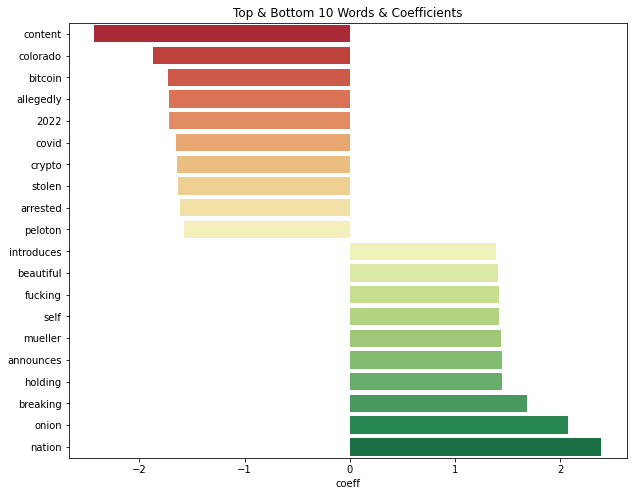

In [181]:
# Displaying truncated coefficients Dataframe in a barplot
plt.figure(figsize=(10,8))
sns.barplot(data=logreg_coeff_df_10, y=logreg_coeff_df_10.index, x='coeff', palette="RdYlGn")
plt.title('Top & Bottom 10 Words & Coefficients');

Using the model coefficients, we are able to find the effect (no. of times) of a word occurence on the model classification.

In [182]:
logreg_coeff_df_10['exp_coeff'] = [round((np.exp(abs(i))),2) for i in logreg_coeff_df_10['coeff']]
onion_coeff_10 = logreg_coeff_df_10.head(10)
notonion_coeff_10 = logreg_coeff_df_10.tail(10)

In [183]:
notonion_coeff_10.sort_values(by='exp_coeff',ascending=False).head(3)

,coeff,exp_coeff
nation,2.39,10.91
onion,2.07,7.92
breaking,1.68,5.37


In [184]:
onion_coeff_10.head(3)

,coeff,exp_coeff
content,-2.43,11.36
colorado,-1.87,6.49
bitcoin,-1.73,5.64


[Contents](#toc)
***
## 8. Conclusion<a class="anchor" id="8"></a>


#### 8a. Best Model

##### Based on Interpretability
An interpretable model helps us fundamentally understand the value and accuracy of our findings.

To interpret model coefficients, we have chosen `Count Vectorizer` and `Logistic Regression` model. We were able to interpret model coefficients and identify the top words that contribute the most positively to the following subreddits. For each occurrence of the following words, the chance of the word appearing in a subreddit increases by $x$ times.

  | Subreddit: | `NotTheOnion` | `TheOnion` |
  | --- | --- | --- |
  | # 1 | nation (10.91x) | content (11.36x) |
  | # 2 | onion (7.92x) | colorado (6.49x) |
  | # 3 | onion (5.37x) | bitcoin (5.64x) |

<font size="2">*(i.e. A post with the word "nation" will be 10.91 times more likely to be from the `NotTheOnion` subreddit.)*</font>

However, our goal here is to create an accurate model with a low F1 score, given the impact of both FPs and FNs are equally detrimental. Hence, we want to find a model that gives the best score. <br>

##### Based on Accuracy

We have tried the following vectorizers and models:

- **Vectorizer:**
    1. `Count Vectorizer` *(Best!)*
    2. `TFIDF` 

- **Classification Model:**
    1. `Multinomial Naive Bayes` *(Best!)*
    2. `Logistic Regression`
    3. `Random Forest`


The model that gives the best score is `Count Vectorizer` and `Multinomial Naive Bayes` model, with the parameters:
- `ngram_range`: (1,2)
- `alpha`: 1.95

The best score is 0.812 (81.2% accuracy), which is a good improvement in comparison to our baseline model, which has an score of 0.5 (50% accuracy).

Our `Count Vectorizer` and `Multinomial Naive Bayes` model 
- gives the best F1 score (least False Positives and False Negatives);
- is simple and easy to implement;
- is good and accurate text classification prediction.


#### 8b. Problems
- The model is overfitted to the training set 
    - Train score (0.984) is significantly higher than the Test Score (0.824), which amounts to a ~16% difference in accuracy.
    - However, since we are optimizing for accuracy, more importantly we want choose a model with the highest percentage of correct predictions.
- Our model is limited to English words only
    - non-English posts were dropped completely in EDA.
- Model might not be a good representative of the content for future subreddit posts
    - Recentness of the terms used affects our model accuracy;
    - New words and acronyms are created every day;
    - Shift in topic of concern/discussion:
        - Topic of interest that are being discussed changes with current events and time periods;
        - i.e `NotTheOnion` tends to reflect current global issues.

A well-rounded model should take into account the other features or recognize the type of content discussed in a subreddit thread, not just words.


#### 8c. Possible Enhancements
- Consider Non-text Posts 
    - i.e. images, videos
- Explore Other Features
    - i.e. subtexts, comments, upvotes
- Analysing Post Authors
    - Authors play a critical role in the authenticity of a post's content;
    - Analyse posting patterns or the type content posted;
    - Look at authors posting history and number of posts made, because an author that have posted fake news before will more likely be posting fake news again.
- Non-Binary Classification
    - For this project, we assumed that the classification is binary;
    - In reality, classification of news might be more than just fake or real news; there can be a differentiation between "Fake News" and "Sattire News".
- Content-based Analysis 
    - Further exploration is needed to better understand the content of the posts, not just individual words. With this in mind, we may $-$
- Explore Other NLP methods
    - e.g. [BERT](https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/)
        - a transformer-based machine learning technique for NLP pre-training developed by Google,
        - pre-trained on a large corpus of unlabelled text including the entire Wikipedia (\~2.5 billion words) and BookCorpus (\~800 million words)
        - a “deeply bidirectional” model, it considers both the left and the right side of a token’s context before making a prediction.

[Contents](#toc)